Dataset Preprocess

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("iris.csv")
print(df.isnull().sum())
print(df.describe())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


K-means Clustering

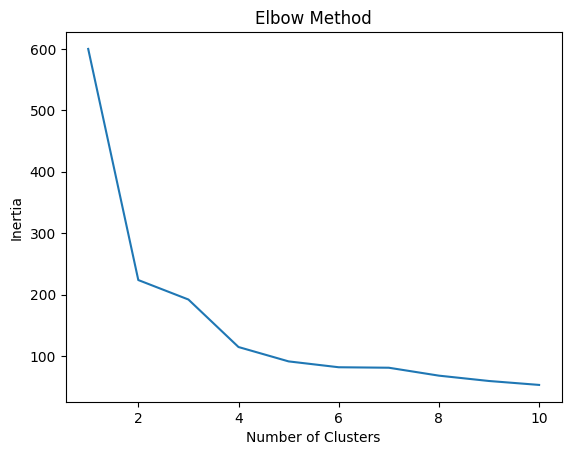

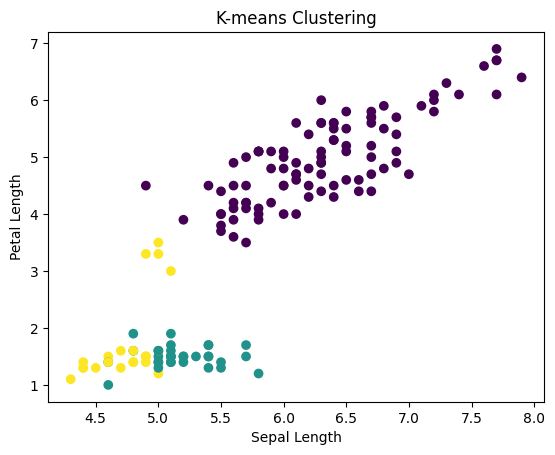

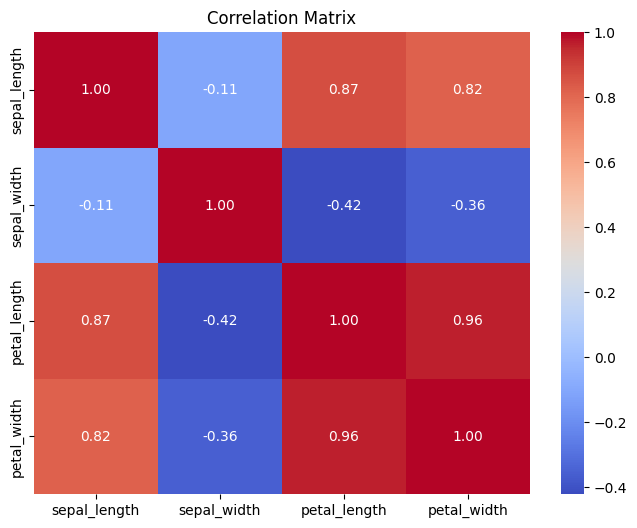

Silhouette Score: 0.4787241921049546


In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit K-means with optimal clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.scatter(df['sepal_length'], df['petal_length'], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

correlation_matrix = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

score = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {score}')

Linear Regression Fitting

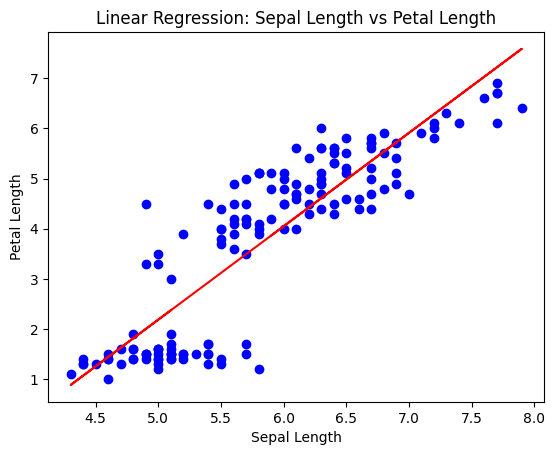

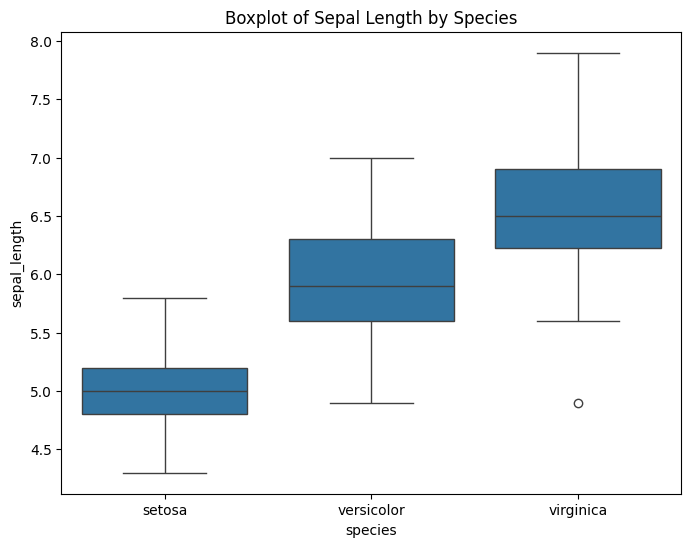

In [6]:
from sklearn.linear_model import LinearRegression
X_reg = df[['sepal_length']].values
y_reg = df['petal_length'].values

regressor = LinearRegression()
regressor.fit(X_reg, y_reg)

plt.scatter(X_reg, y_reg, color='blue')
plt.plot(X_reg, regressor.predict(X_reg), color='red')
plt.title('Linear Regression: Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Boxplot of Sepal Length by Species')
plt.show()